<a href="https://colab.research.google.com/github/VidhulaaT/Jovian-career-webpage-flask/blob/main/Youtube_video_transcript_summarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We need two packages  1. Transformers package  2. youtube_transcript_api package - this api helps to get the closed caption in that youtube video

In [1]:
! pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.5 MB/s eta 0:00:00


In [4]:
! pip install -q youtube_transcript_api

In [5]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [6]:
youtube_video = "https://www.youtube.com/watch?v=3SXBFej2akQ"

In [7]:
video_id = youtube_video.split("=")[1]

In [8]:
video_id

'3SXBFej2akQ'

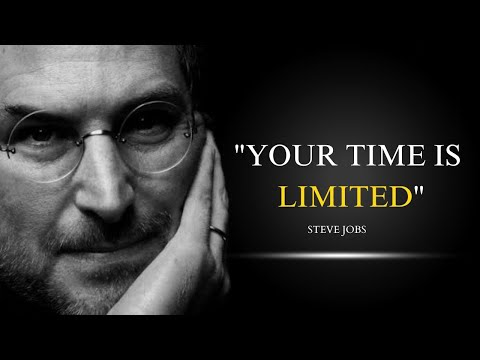

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In this part we are getting the youtube video transcript


In [11]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [12]:
transcript[0:5]

[{'text': "I'm honored to be with you today for",
  'start': 2.879,
  'duration': 4.261},
 {'text': 'your commencement from one of the finest',
  'start': 5.58,
  'duration': 3.33},
 {'text': 'universities in the world', 'start': 7.14, 'duration': 2.11},
 {'text': '[Music]', 'start': 8.91, 'duration': 2.97},
 {'text': '[Applause]', 'start': 9.25, 'duration': 4.969}]

At this point we don't have a pure text file but we have the JSON object -- We are iterating over the transcript json object and adding it to the result set

In [13]:
result = ""
for i in transcript:
  result +=  ' ' + i['text']
#print(result)
print(len(result))

9231


Now we got the text , next step is to summarize the text we got . We are downloading the pretrained models using pipeline

In [14]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [16]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i+1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n" +out)
  summarized_text.append(out)

  #print(summarized_text)

input text 
 I'm honored to be with you today for your commencement from one of the finest universities in the world [Music] [Applause] truth be told I never graduated from college and uh this is the closest I've ever gotten to a college graduation today I want to tell you three stories from my life that's it no big deal just three stories the first story is about connecting the dots I dropped out of Reed College after the first six months but then stayed around as a drop-in for another 18 months or so before I really quit so why'd I drop out it started before I was born my biological mother was a young unwed graduate student and she decided to put me up for adoption it felt very strongly that I should be adopted by college graduates so everything was all set for me to be adopted at Birth by a lawyer and his wife [Music] except that when I popped out they decided at the last minute that they really wanted a girl [Music] so my parents who were on a waiting list got a call in the middle 

Your max_length is set to 142, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


Summarized text
 Remember that you are going to die is the best way I know to avoid the Trap of thinking you have something to lose you are already naked there is no reason not to follow your heart no one wants to die even people who want to go to heaven don't want to die to get there .
input text 
 opinions drowned out your own inner voice and most important have the courage to follow your heart and intuition they somehow already know what you truly want to become everything else is secondary stay hungry stay foolish [Music]
Summarized text
 Have the courage to follow your heart and intuition they somehow already know what you truly want to become everything else is secondary .  opinions drowned out your own inner voice and most important have the courage .   following your heart   is secondary to stay hungry stay foolish [Music]


In [17]:
len(str(summarized_text))

3350

In [18]:
str(summarized_text)

'[" This is the closest I\'ve ever gotten to a college graduation today I want to tell you three stories from my life that\'s it no big deal just three stories the first story is about connecting the dots .  I\'m honored to be with you today for your commencement from one of the finest universities in the world [Music]", \' 17 years later I did go to college but I naively chose a college that was almost as expensive as Stanford . I had no idea what I wanted to do with my life and no idea how College was going to help me figure it out . I decided to drop out and trust that it would all work out okay it was pretty scary at the time but looking back it was one of the best decisions I ever made .\', " College at that time offered perhaps the best calligraphy instruction in the country throughout the campus . Every poster every label on every drawer was beautifully hand calligraphed because I had dropped out and didn\'t have to take the normal classes . I would walk the seven miles across t